In [1]:
#import basic libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
#load dataset creditcard.csv
df=pd.read_csv("creditcard.csv") 
#view first 5column
pd.set_option("display.max_columns",None) #to display all column
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#separate Independent variable(input variable) X and dependent variable 
#Y(target/output)
X=df.drop("Class",axis=1) #to store all inputs hold in X variable apart from
#deposit
Y=df["Class"]

In [4]:
#Split our dataset in train test of 70% & 30%
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=1)

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
Y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [7]:
#create object of RandomOverSampler
ros=RandomOverSampler()

In [8]:
X_train_sample,Y_train_sample=ros.fit_resample(X_train,Y_train)
X_test_sample,Y_test_sample=ros.fit_resample(X_test,Y_test)

In [9]:
pd.Series(Y_train_sample).value_counts()

1    199007
0    199007
Name: Class, dtype: int64

In [10]:
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [11]:
pd.Series(Y_test_sample).value_counts()

1    85308
0    85308
Name: Class, dtype: int64

In [12]:
#create object of StandardScaler
ss=StandardScaler()

In [13]:
X_train_sample=ss.fit_transform(X_train_sample)
X_test_sample=ss.fit_transform(X_test_sample)


In [14]:
X_train_sample

array([[ 8.72353850e-01,  4.11415778e-01, -4.43780002e-01, ...,
        -8.50466679e-02, -4.19493469e-02, -3.62323467e-01],
       [ 2.63636480e-01,  4.44853573e-01, -2.25554816e-01, ...,
        -1.66421008e-01, -7.73140614e-03, -3.84843005e-01],
       [ 1.51377444e+00,  8.08886604e-01, -4.78085903e-01, ...,
        -1.41079177e-01, -1.91787990e-01, -4.14281954e-01],
       ...,
       [ 1.31749262e+00,  7.71404531e-01, -2.18276475e-01, ...,
        -3.46197995e-02, -1.68664202e-03, -4.18391664e-01],
       [-5.72149571e-01, -1.01006852e+00, -1.74998673e+00, ...,
        -3.69671000e-02, -2.29924263e+00,  9.16006276e-01],
       [ 3.18648716e-01,  1.88194052e-01,  4.76951389e-01, ...,
         2.28759696e-01, -7.99609603e-01, -4.13023879e-01]])

In [15]:
#Create object of PCA class
pc=PCA(n_components=None,random_state=1)  
#n_components  inbuilt parameters ,here  pass no. of components means PC here total input 29 features
#input features

In [16]:
X_train_pc=pc.fit_transform(X_train_sample) #for training

In [17]:
X_test_pc=pc.transform(X_test_sample)  #for testing

In [18]:
explained_variance=pc.explained_variance_ratio_
print(explained_variance) #automatic arrange variance in descending order

[3.82465977e-01 9.51703228e-02 8.09581768e-02 5.37141643e-02
 5.18262242e-02 4.18515618e-02 3.55865664e-02 3.38699623e-02
 3.06946263e-02 2.74084107e-02 2.56134037e-02 2.20532771e-02
 2.05326910e-02 1.89139427e-02 1.34617139e-02 1.32204974e-02
 1.03318361e-02 8.27138309e-03 7.71269148e-03 5.47467171e-03
 4.34855716e-03 3.83727274e-03 2.69496990e-03 2.50905447e-03
 1.86275481e-03 1.69622121e-03 1.48119683e-03 1.27415505e-03
 8.39928686e-04 3.23787878e-04]


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#Create object of PCA class
pc1=PCA(n_components=5,random_state=1)  
#n_components  inbuilt parameters ,here  pass no. of components =5 means PC here total input 29 features
#input features

In [21]:
X_train_pc1=pc1.fit_transform(X_train_sample) #for training
X_test_pc1=pc1.transform(X_test_sample) #for testing

In [22]:
variance=pc1.explained_variance_ratio_
print(variance) #automatic arrange variance in descending order

[0.38246598 0.09517032 0.08095818 0.05371414 0.05182613]


In [23]:
#classification algorithm 
#use logistic regression algorithm
#create the object of LogisticRegression
lr=LogisticRegression()

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
def create_model(model):
    model.fit(X_train_pc1,Y_train_sample)
    Y_pred=model.predict(X_test_pc1)
    print(classification_report(Y_test_sample,Y_pred))
    print("confusion_matrix")
    print(confusion_matrix(Y_test_sample,Y_pred))
    return model

In [26]:
#call the function
create_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     85308
           1       0.97      0.85      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[83095  2213]
 [13086 72222]]


LogisticRegression()

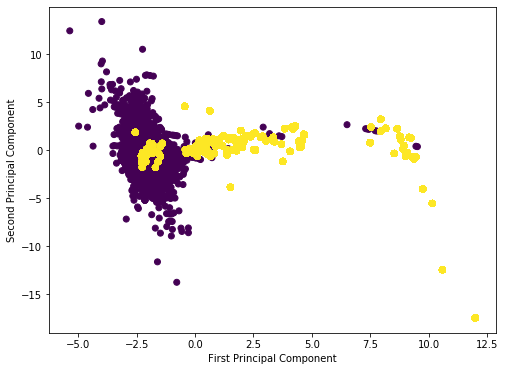

In [27]:
# giving a scatter plot
plt.figure(figsize =(8, 6))
y=Y_test_sample
X1=X_test_pc1[:, 0]
X2=X_test_pc1[:, 1]
plt.scatter(X1,X2,c=y)#c means color

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [28]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [29]:
ada=AdaBoostClassifier(n_estimators=25,random_state=1)
gbc=GradientBoostingClassifier(n_estimators=25,random_state=1)

In [30]:
create_model(ada)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.96      0.86      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[82629  2679]
 [11945 73363]]


AdaBoostClassifier(n_estimators=25, random_state=1)

In [31]:
create_model(gbc)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     85308
           1       0.98      0.82      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[83626  1682]
 [15090 70218]]


GradientBoostingClassifier(n_estimators=25, random_state=1)

In [32]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=10,random_state=1)
#n_estimators should not be greator than 100

In [33]:
create_model(xgb)

[22:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.97      0.85      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[83269  2039]
 [12494 72814]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [35]:
#create object of DecisionTreeClassifier
dt=DecisionTreeClassifier()
create_model(dt)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     85308
           1       1.00      0.69      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.84    170616
weighted avg       0.88      0.85      0.84    170616

confusion_matrix
[[85237    71]
 [26272 59036]]


DecisionTreeClassifier()

In [36]:
#create object of DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=2)
create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     85308
           1       0.97      0.83      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[82804  2504]
 [14342 70966]]


DecisionTreeClassifier(max_depth=2)

In [37]:
#create object of DecisionTreeClassifier
dt2=DecisionTreeClassifier(min_samples_leaf=95)
create_model(dt2)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     85308
           1       0.99      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[84306  1002]
 [16197 69111]]


DecisionTreeClassifier(min_samples_leaf=95)

In [38]:
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=95,random_state=1)
create_model(rfc)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       1.00      0.74      0.85     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

confusion_matrix
[[85289    19]
 [21838 63470]]


RandomForestClassifier(n_estimators=95, random_state=1)

In [39]:
#create the object of Logistic regression 
lr=LogisticRegression()
#create the object of DecisionTreeClassifier
dt=DecisionTreeClassifier() #by defualt gini index method used
#create the object of DecisionTreeClassifier (Entropy)
dt1=DecisionTreeClassifier(criterion="entropy") #entropy otherwise gini index

In [40]:
#Basic steps : -
#Create a model List : - name model_list it a user defined list object
model_list=[("logistic",lr),("DecisionGini",dt),("DecisionEntropy",dt1)]

'''A list consists of multiple tuples and each tuples the first argument
has to be a string that is a name of model and second argument has to be a 
object of model'''

'A list consists of multiple tuples and each tuples the first argument\nhas to be a string that is a name of model and second argument has to be a \nobject of model'

In [41]:
#create object of VotingClassifier class
vc=VotingClassifier(estimators=model_list) #by default hard voting
#here in estimators parameters , pass list of model 

In [42]:
create_model(vc)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.71      0.83     85308

    accuracy                           0.85    170616
   macro avg       0.89      0.85      0.85    170616
weighted avg       0.89      0.85      0.85    170616

confusion_matrix
[[85266    42]
 [25032 60276]]


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('DecisionGini', DecisionTreeClassifier()),
                             ('DecisionEntropy',
                              DecisionTreeClassifier(criterion='entropy'))])

In [43]:
#Soft voting : -
#create object of VotingClassifier class
vc1=VotingClassifier(estimators=model_list,voting="soft")
#by default hard voting if not mension second parameter voting="soft"
#here in estimators parameters , pass list of model 

In [44]:
create_model(vc1)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     85308
           1       1.00      0.69      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.84    170616
weighted avg       0.88      0.85      0.84    170616

confusion_matrix
[[85257    51]
 [26251 59057]]


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('DecisionGini', DecisionTreeClassifier()),
                             ('DecisionEntropy',
                              DecisionTreeClassifier(criterion='entropy'))],
                 voting='soft')

In [45]:
#create the object of BaggingClassifier class
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=19900,random_state=1)
#first agrument :  what type of algorithm be need to use Lets we choose to use
#Logistic Regression  
#2. second argument : How many Logistic regression algo. means no. of 
#instance  of logistic regression ,here take 10 logistic regression algo.
#so we have to pass an argument called n_estimators 
#third argument : Each of them will be train on each sample
# We take 10 records in each sample

In [46]:
#call function
create_model(bc)

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     85308
           1       0.97      0.85      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

confusion_matrix
[[83134  2174]
 [13086 72222]]


BaggingClassifier(base_estimator=LogisticRegression(), max_samples=19900,
                  random_state=1)

In [47]:
#Pasting : - use same class BaggingClassifier class
#create the object of BaggingClassifier class for pasting
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=19900,random_state=1,bootstrap=False)
#bootstrap=True bydefault means mension Bagging if mension bootstrap=False
#then it is pasting

In [48]:
#call function
create_model(bc1)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     85308
           1       0.97      0.84      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.91      0.91      0.91    170616
weighted avg       0.91      0.91      0.91    170616

confusion_matrix
[[83182  2126]
 [13738 71570]]


BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False,
                  max_samples=19900, random_state=1)

In [49]:
#check installed or not
from mlxtend.classifier import StackingClassifier

In [50]:
#stacking is extra step
#we train the same dataset df(credit_card.csv) on 3 different types og algorithm
#of classification (1. Logistic regression ,2. DecisionTreeClassifier(Gini index),
#3. DecisionTreeClassifier(criterion="entropy")) as similar to Naive aggregation

#create the object of Logistic regression 
lr=LogisticRegression()
#create the object of DecisionTreeClassifier
dt1=DecisionTreeClassifier()  #by defualt gini index method used
#create the object of DecisionTreeClassifier (Entropy)
dt2=DecisionTreeClassifier(criterion="entropy")  #entropy otherwise gini index

In [51]:
#Create a model List : - name model_list it a user defined list object
model_list=[lr,dt1,dt2] #we create only list of model

In [52]:
meta=LogisticRegression() # here we take metaclassifier is Logistic regression
#means o/p of all prob's value of all algo. is a input of Meta classifier algo.

In [53]:
#Create the object of StackingClassifier class and pass the no. of arguments/
#parameters
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [54]:
#call function 
create_model(sc)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     85308
           1       1.00      0.68      0.81     85308

    accuracy                           0.84    170616
   macro avg       0.88      0.84      0.84    170616
weighted avg       0.88      0.84      0.84    170616

confusion_matrix
[[85262    46]
 [26888 58420]]


StackingClassifier(classifiers=[LogisticRegression(), DecisionTreeClassifier(),
                                DecisionTreeClassifier(criterion='entropy')],
                   meta_classifier=LogisticRegression())

# conclusion:
### we get recall of 0.90 by using AdaBoosClassifier with n_estimators=10 which is good as compared to other ensemble technique